# コンテナ起動時にまず読み込む

In [58]:
import numpy as np
import scipy.special as scm
from scipy import integrate
from scipy.misc import derivative 
import matplotlib.pyplot as plt

from scipy import version
print(version.full_version)

import pandas as pd

from sklearn.model_selection import train_test_split


1.11.3


数式を書く場合のチートシート
- https://qiita.com/namoshika/items/63db972bfd1030f8264a
- 

# 二項分布と正規分布


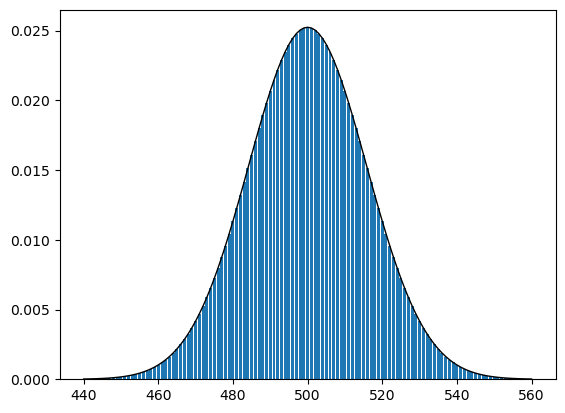

In [25]:

# 正規分布関数の定義
def gauss(x, n):
    m = n/2
    return np.exp(-(x-m)**2 / m) / np.sqrt(m * np.pi)

N = 1000
M = 2**N
X = range(440,561)
plt.bar(X, [scm.comb(N, i)/M for i in X])
plt.plot(X, gauss(np.array(X), N), c='k', linewidth=1)
plt.show()

In [ ]:
## numpy.arrayはベクトル、行列、テンソルの演算が簡単にできる

In [22]:
T = range(3)
#print(T*3)
# => 単純な配列に対する四則演算はエラーになる。

# 一方、numpy.arrayでndarrayオブジェクトを作ると、ベクトル／行列／テンソルに対しての演算が直接できるようになる
# 3列 × 1行の掛け算
print(np.array(T)*3)

[0 3 6]


## 確率は領域の面積に等しい


### 正規分布関数

$$ 
f(x,\mu,\sigma) = \frac{1}{\sqrt{2 \pi \mu}} \exp( - \frac{ (x - \mu)^2 }{ 2 \sigma^2})
$$

この式で、$P(X_1=1)=\it{p}$としたとき、

- $\mu = \it{np}$ 
- $\sigma^2 = \it{np}(1-\it{p})$

となる

単一の試行で、1（コインの表）の結果の確立が$ p = 1/2 $ の場合の近似式は、$ \mu = np= n / 2 $、$ \sigma^2 = np (1-p) = n/4 $


$ P(X_{1000} \leqq 480) \approx \int_0^{480}f(x)dx $

a



In [31]:
def normal(x):
    return np.exp(- (x - 500)**2 / 500) / np.sqrt(500 * np.pi)

integrate.quad(normal, 0, 480)

(0.10295160536603419, 1.1220689434463503e-13)

/tmp/ipykernel_7409/2273154313.py:9: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfunc=derivative(test,X,dx=1e-5)


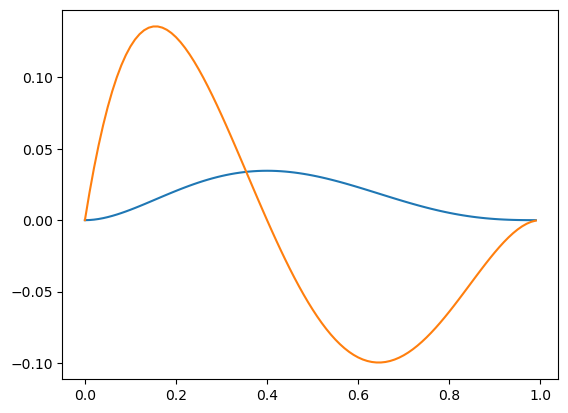

In [49]:
def test(p):
    return p**2 * (1-p)**3

X_range=range(0,100)
X=np.array(X_range)/100

plt.plot(X, [ test(p) for p in X ])

dfunc=derivative(test,X,dx=1e-5)

plt.plot(X, dfunc)


# 7章 線形回帰モデル

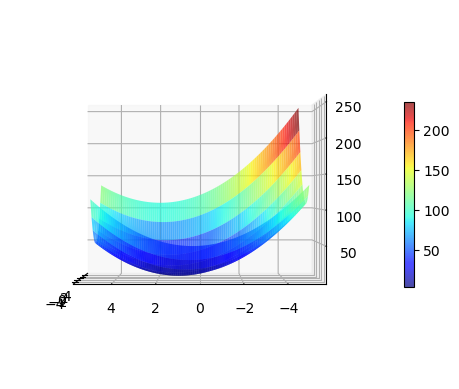

In [72]:
def func71(u,v):
    return 3*u**2 + 3*v**2 -u*v + 7*u -7*v +10

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surface = ax.plot_surface(X, Y, func71(X,Y), cstride=10, rstride=1, cmap='jet', alpha=0.7)
# カラーバーの設定
fig.colorbar(surface, ax=ax, shrink=0.5)
# 回転設定　elev:仰角、azim（aimuth）：方位角　https://python.atelierkobato.com/elevation_azimuth/
ax.view_init(elev=0, azim=180)

plt.show()

#このグラフだと、確かに(-1,1)あたりが最も低くなるように見える


## 7.2 The Boston Housing Datasetを使ったモデルの作成

### メタデータ

```
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

```

ここからDL　https://github.com/selva86/datasets/blob/master/BostonHousing.csv

ied homes in $1000's

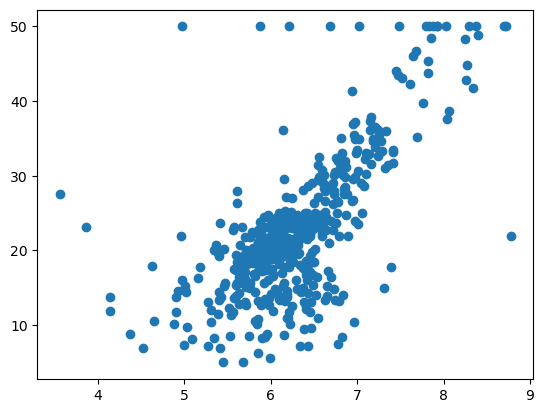

In [80]:
data = pd.read_csv('dataset/BostonHousing.csv')
# 散布図はscatter関数を使う
plt.scatter(data.rm,data.medv)

 # 8章 ロジスティック回帰

 ## iris dataset仕様

 1. sepal length in cm  2. sepal width in cm   3. petal length in c    4. petal width in  
   5. clas  ‐   -- Iris Se       -- Iris Versic        -- Iris Virginica


In [3]:
# データ読み込み

#iris_row = pd.read_csv('dataset/iris.data', header=None, names=["sepal_length","sepal_width","petal_length","petal_width","class"])
iris_row_df = pd.read_csv('dataset/iris.data')



Axes(0.125,0.11;0.775x0.77)
   sepal_length  sepal_width  class_code
0           5.1          3.5           0
1           4.9          3.0           0
2           4.7          3.2           0
3           4.6          3.1           0
4           5.0          3.6           0
    sepal_length  sepal_width  class_code
50           7.0          3.2           1
51           6.4          3.2           1
52           6.9          3.1           1
53           5.5          2.3           1
54           6.5          2.8           1


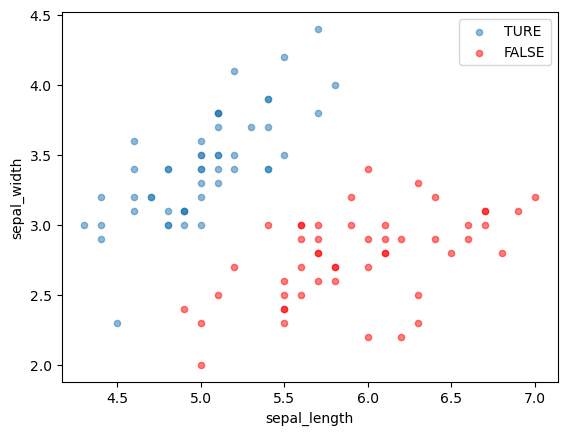

In [4]:

#irisdf["classcode"]= irisdf.iris_class.apply( lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-versicolor" else 2 )
iris_df = iris_row_df.assign(class_code = iris_row_df.iris_class.apply( lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-versicolor" else 2 ) )

df_cap8 = iris_df.query('class_code in [0,1]').loc[:,["sepal_length","sepal_width","class_code"]]

df_cap8_true = df_cap8.query('class_code == 0')
df_cap8_false = df_cap8.query('class_code == 1')

ax = df_cap8_true.plot.scatter(x="sepal_length", y="sepal_width", alpha=0.5, label='TURE')
ax = df_cap8_false.plot.scatter(x="sepal_length", y="sepal_width", c='r', alpha=0.5, label='FALSE',ax=ax)
print(ax)

print(df_cap8_true.head(5))
print(df_cap8_false.head(5))

### まずは手計算の検算から

In [6]:

small_df = pd.concat([df_cap8_true.head(3),df_cap8_false.head(3)],ignore_index=True)

small_df

,sepal_length,sepal_width,class_code
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,7.0,3.2,1
4,6.4,3.2,1
5,6.9,3.1,1


In [56]:
# parameter

x = small_df.loc[:,["sepal_length","sepal_width"]].to_numpy()
yt = small_df.class_code.to_numpy()
M = x.shape[0]

# 1列目を1埋めする
ones = np.ones((M,1))
x = np.block([ones,x])
print(f'x:{x}')
print(f'yt:{yt}')

D = x.shape[1]
# wの初期値を0.1とした
w=np.ones(D) / 10
print(f'w0:{w}')

alpha=0.1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def pred(x,w):
    print(f'u:{x@w}')
    return sigmoid(x @ w)
# 1回目の計算
yp = pred(x,w)
print(f'yp:{yp}')
yd = yp - yt
print(f'yd:{yd}')
xyd = x.T@yd
print(f'x@yd:{xyd}')
w = w - xyd * alpha / M
print(f'w1={w}')

# 2回目の計算
yp = pred(x,w)
print(f'yp:{yp}')
yd = yp - yt
print(f'yd:{yd}')
xyd = x.T@yd
print(f'x@yd:{xyd}')
w = w - xyd * alpha / M

print(f'w2={w}')


x:[[1.  5.1 3.5]
 [1.  4.9 3. ]
 [1.  4.7 3.2]
 [1.  7.  3.2]
 [1.  6.4 3.2]
 [1.  6.9 3.1]]
yt:[0 0 0 1 1 1]
w0:[0.1 0.1 0.1]
u:[0.96 0.89 0.89 1.12 1.06 1.1 ]
yp:[0.72312181 0.70889017 0.70889017 0.75398872 0.74269055 0.75026011]
yd:[ 0.72312181  0.70889017  0.70889017 -0.24601128 -0.25730945 -0.24973989]
x@yd:[1.38784152 5.4012021  4.54122535]
w1=[0.07686931 0.00997997 0.02431291]
u:[0.21286232 0.19870987 0.20157646 0.22453038 0.2185424  0.22110109]
yp:[0.55301555 0.54951465 0.55022417 0.55589796 0.55441918 0.55505119]
yd:[ 0.55301555  0.54951465  0.55022417 -0.44410204 -0.44558082 -0.44494881]
x@yd:[ 0.31812269 -0.9315237   1.11848922]
w2=[0.07156726 0.02550536 0.00567142]


### 続いて、本の通りに実装してみる

In [72]:
df_cap8

x = df_cap8.loc[:,["sepal_length","sepal_width"]].to_numpy()
yt = df_cap8.class_code.to_numpy()

M = x.shape[0]
ones = np.ones((M,1))
x = np.block([ones,x])
#print(f'x:{x}')
#print(f'yt:{yt}')


x_train, x_test, y_train, y_test = train_test_split(x, yt, test_size=0.3)

print(f'x_train.shape:{x_train.shape}')
print(f'x_test.shape:{x_test.shape}')
print(f'y_train.shape:{y_train.shape}')
print(f'y_test.shape:{y_test.shape}')

x = x_train
yt = y_train

# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 推論関数
def pred(x,w):
    return sigmoid(x @ w)

# 損失関数（交差エントロピー関数）
def cross_entropy(yp,yt):
    # 交差エントロピーの計算
    cel = - ( yt * np.log(yp) + (1-yt) * np.log(1-yp))
    # 平均値を返却する
    return np.mean(cel)

# 予測結果の確率から0or1を判断する関数
def classify(y):
    return np.where(y < 0.5, 0 ,1)

# モデルを評価する関数
from sklearn.metrics import accuracy_score
def evaluate(xt,yt,w):
    # 予測値の計算
    yp = pred(xt,w)
    # 損失関数の計算
    loss = cross_entropy(yp,yt)
    # 予測値（確率値）を0or1に変換
    yp_b = classify(yp)
    # 精度の算出
    score = accuracy_score(yt,yp_b)
    return loss, score


M = x_train.shape[0]
D = x_train.shape[1]
# wの初期値を0.1とした
w = np.ones(D)
print(f'w0:{w}')

alpha = 0.1

iter = 1000

# 評価記録用変数
history = np.zeros((0,3))

for k in range(iter):

    #　予測の計算
    yp = pred(x, w)

    #　誤差の計算
    yd = yp - yt

    #　勾配降下法の計算
    w = w - alpha / M * (x.T @ yd)

    if ( k % 10 == 0 ):
        loss, score = evaluate(x_test, y_test, w)
        history = np.vstack([history, np.array([k, loss, score])])
        print(f'iter:{iter}\t loss={loss}\t score={score}')

print(f'初期状態\t損失関数:{history[0,1]}\t精度:{history[0,2]}')
print(f'最終状態\t損失関数:{history[-1,1]}\t精度:{history[-1,2]}')


x_train.shape:(70, 3)
x_test.shape:(30, 3)
y_train.shape:(70,)
y_test.shape:(30,)
w0:[1. 1. 1.]
iter:1000	 loss=2.739724753202201	 score=0.6333333333333333
iter:1000	 loss=0.7542596425146196	 score=0.3333333333333333
iter:1000	 loss=0.6811897781774846	 score=0.4666666666666667
iter:1000	 loss=0.6186958015845258	 score=0.9
iter:1000	 loss=0.5651363900887636	 score=0.9333333333333333
iter:1000	 loss=0.5190664784963226	 score=0.9333333333333333
iter:1000	 loss=0.47925223690027646	 score=1.0
iter:1000	 loss=0.44466093817080093	 score=1.0
iter:1000	 loss=0.4144384817183946	 score=1.0
iter:1000	 loss=0.38788294213698293	 score=1.0
iter:1000	 loss=0.36441878665136324	 score=1.0
iter:1000	 loss=0.343573898769497	 score=1.0
iter:1000	 loss=0.3249600898199091	 score=1.0
iter:1000	 loss=0.30825703690886297	 score=1.0
iter:1000	 loss=0.29319926432912424	 score=1.0
iter:1000	 loss=0.2795656890135482	 score=1.0
iter:1000	 loss=0.2671712622339266	 score=1.0
iter:1000	 loss=0.25586029556820206	 score=